### Attribute information
* id (ID number)
* diagnosis (M = malignant, B = benign)
* radius_mean (mean of distances from center to points on the perimeter)
* texture_mean (standard deviation of gray-scale values)
* perimeter_mean
* area_mean
* smoothness_mean (local variation in radius lengths)
* compactness_mean (perimeter^2 / area - 1.0)
* concavity_mean (severity of concave portions of the contour)
* symmetry_mean
* fractal_dimension_mean (“coastline approximation” - 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
1133,93316,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,93317,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,93318,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,93319,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016


In [4]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
957,93140,B,11.27,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.1810,0.07252
153,87106,B,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.1830,0.06105
211,8810528,B,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.1533,0.06057
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.1633,0.07005
716,92899,B,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.1744,0.06493
860,93043,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.1879,0.05852
885,93068,B,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.1673,0.05649
64,85922302,M,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.1905,0.06590
739,92922,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.1959,0.05955
861,93044,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.1730,0.06470


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,1.138000e+03,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,1.523243e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798
std,8.965268e+07,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.027402,0.007057
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,9.299525e+04,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,9.327950e+04,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,9.060125e+05,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [7]:
df.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [8]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [9]:
categoric_features = df.select_dtypes(include=[np.object])
categoric_features.columns

Index(['diagnosis'], dtype='object')

In [10]:
class category:
    def unique_feature(feature):
        for feature in categoric_features:
            print(feature,df[feature].unique())

In [11]:
category.unique_feature(['diagnosis'])

diagnosis ['M' 'B']


In [12]:
class numeric:
    def num_feature():
        for feature in numeric_features:
            if feature!='radius_mean':
                df[feature]=df['radius_mean']-df[feature]
                plt.scatter(df[feature],df['radius_mean'])
                plt.xlabel(feature)
                plt.ylabel('radius_mean')
                plt.title(feature)
                plt.show()
    
    def boxplot():
        for feature in numeric_features:
            df.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()
    
    def histplot():
        for feature in numeric_features:
            df[feature].hist(bins=25)
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.title(feature)
            plt.show()

In [13]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

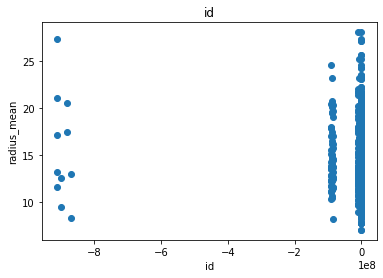

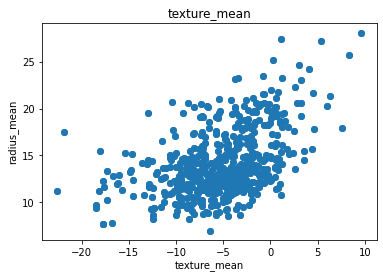

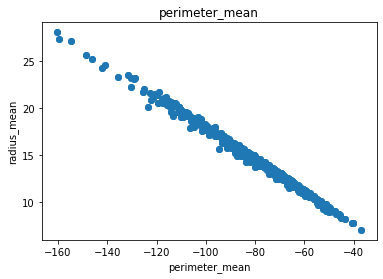

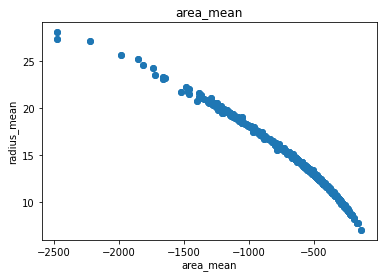

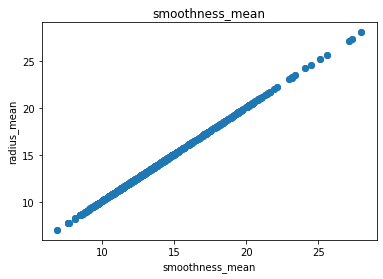

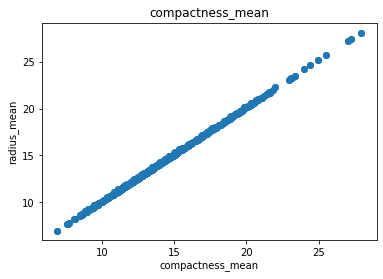

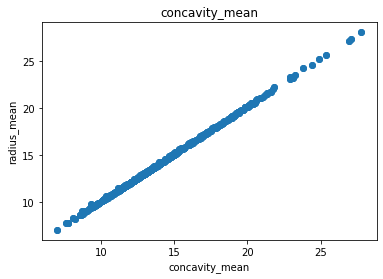

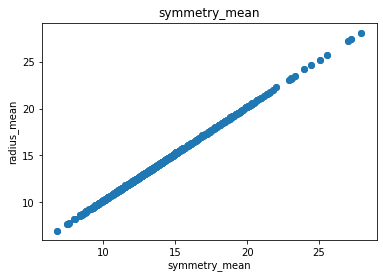

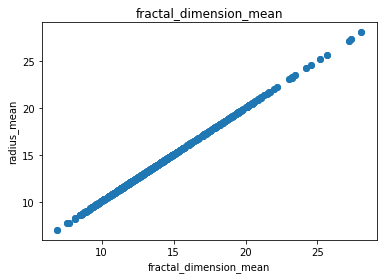

In [14]:
numeric.num_feature()

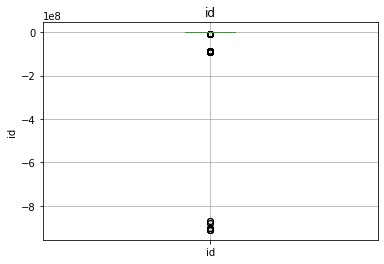

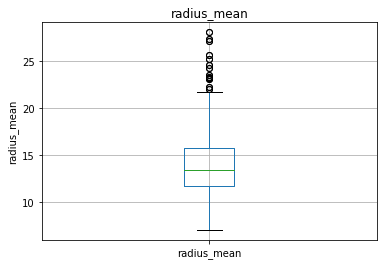

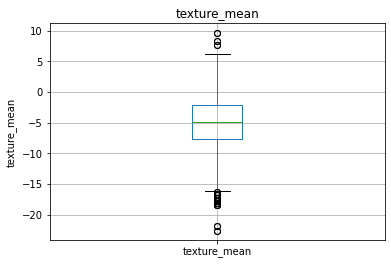

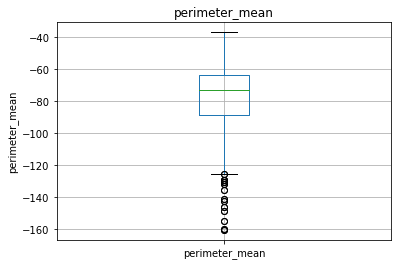

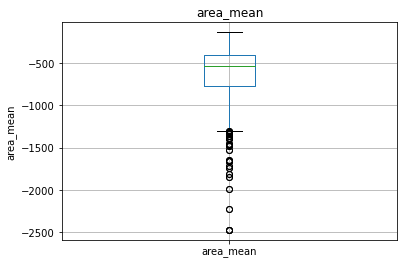

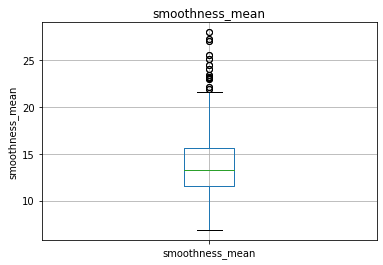

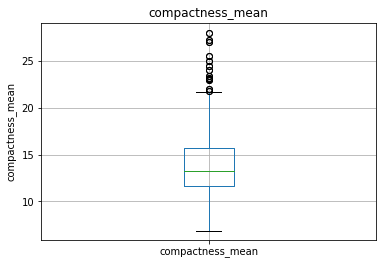

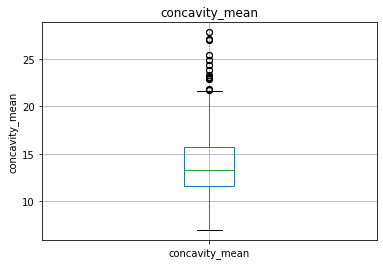

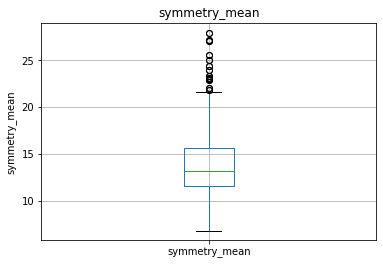

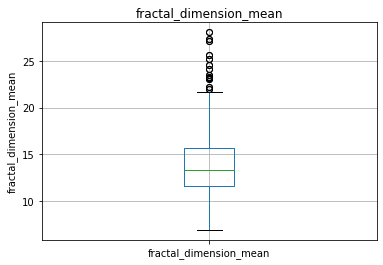

In [15]:
numeric.boxplot()

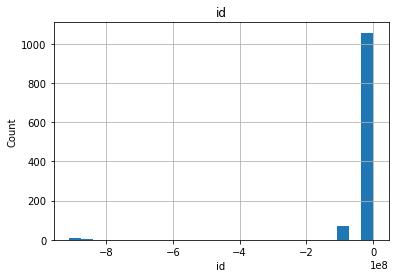

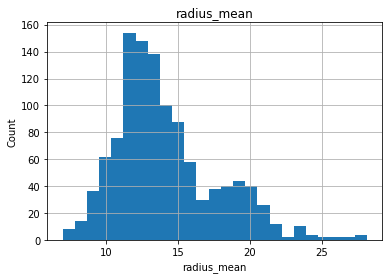

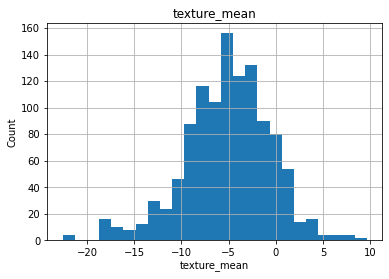

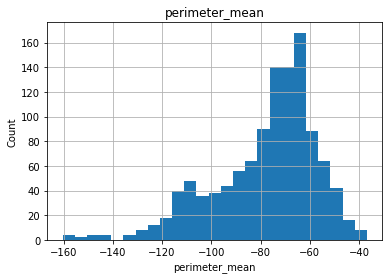

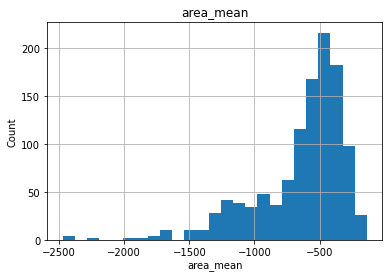

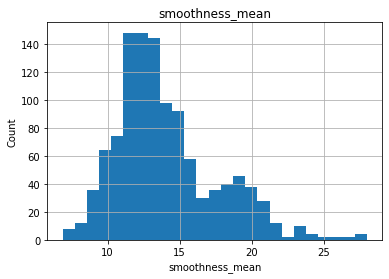

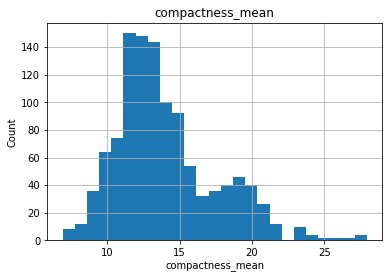

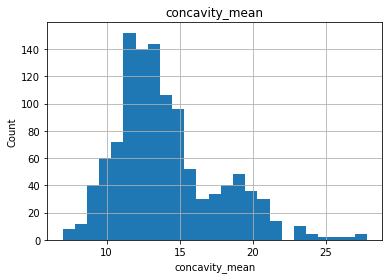

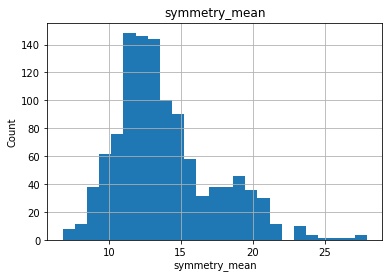

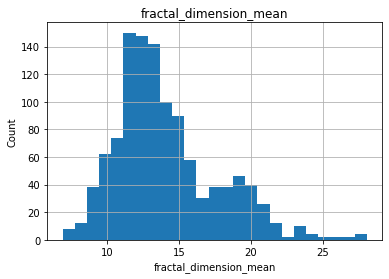

In [16]:
numeric.histplot()

### To visualize any missing values in data

<AxesSubplot:>

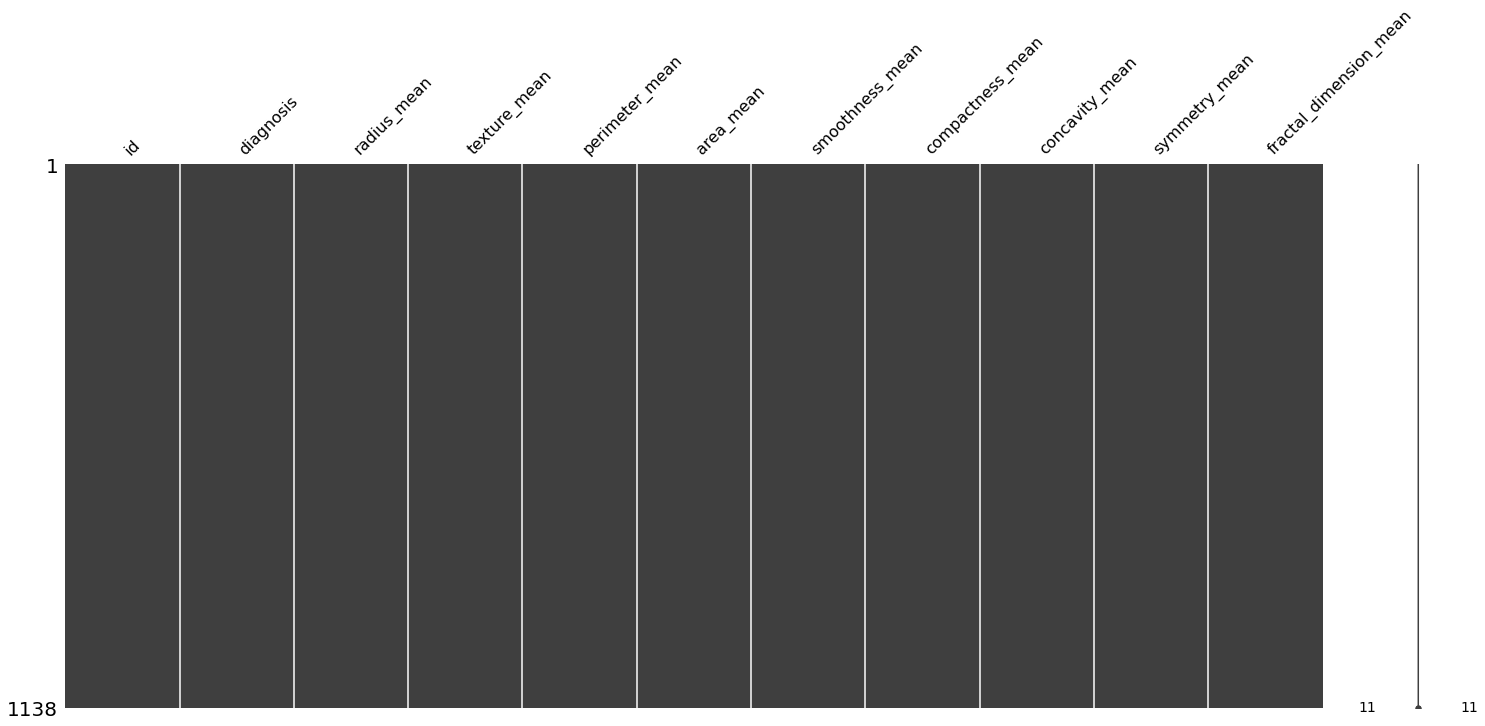

In [17]:
msno.matrix(df)

Since, there is no blank space in between values of variables, there is no missing values in data.

In [18]:
df.skew()

id                       -9.247551
radius_mean               0.941134
texture_mean             -0.432138
perimeter_mean           -0.998029
area_mean                -1.651157
smoothness_mean           0.939303
compactness_mean          0.937300
concavity_mean            0.927101
symmetry_mean             0.938222
fractal_dimension_mean    0.939290
dtype: float64

In [19]:
df.kurt()

id                        88.049633
radius_mean                0.836522
texture_mean               0.951868
perimeter_mean             0.986212
area_mean                  3.669170
smoothness_mean            0.832956
compactness_mean           0.838575
concavity_mean             0.815737
symmetry_mean              0.839505
fractal_dimension_mean     0.834083
dtype: float64

### To know the correlation relationship between variables in a data

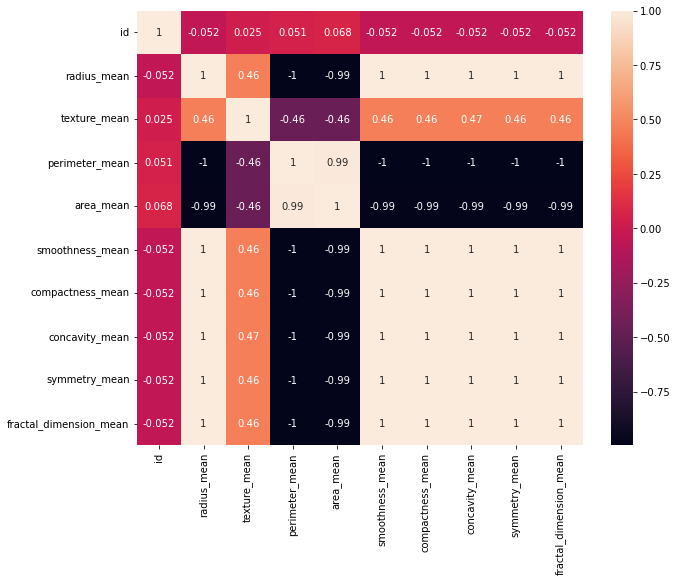

In [20]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
import scipy.stats as st

<AxesSubplot:title={'center':'Log Normal'}, xlabel='fractal_dimension_mean'>

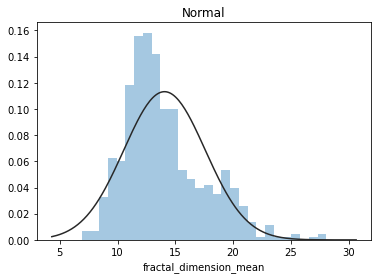

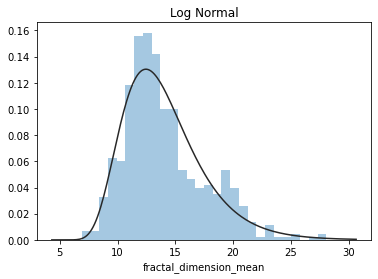

In [22]:
y = df['fractal_dimension_mean']
plt.figure(1); plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y,kde=False,fit=st.lognorm)

It is apparent that fractal dimension mean doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job.

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

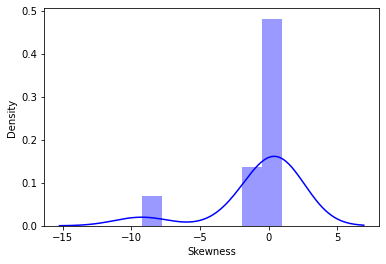

In [23]:
sns.distplot(df.skew(),color='blue',axlabel='Skewness')

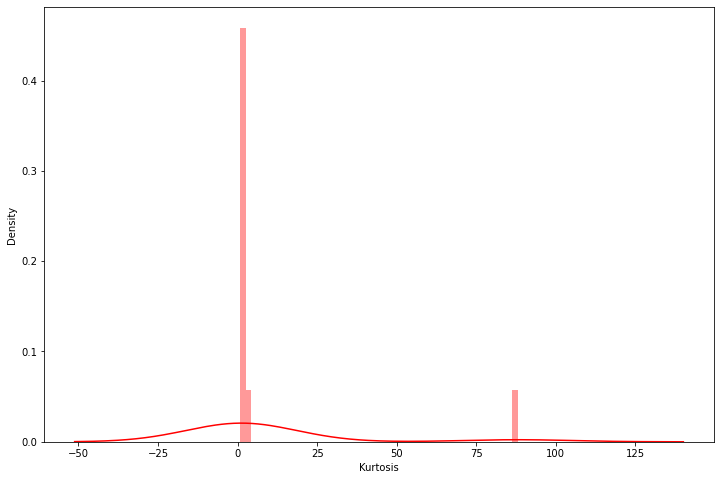

In [24]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel='Kurtosis',norm_hist=False,kde=True)
plt.show()

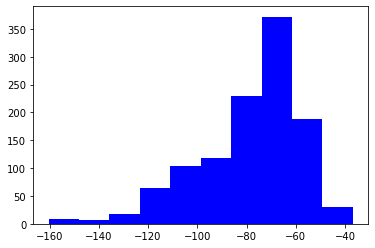

In [25]:
plt.hist(df['perimeter_mean'],orientation='vertical',histtype = 'bar',color='blue')
plt.show()

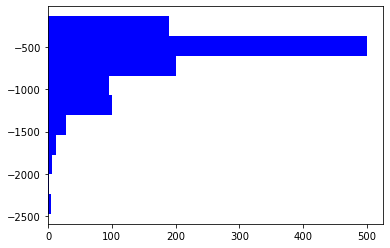

In [26]:
plt.hist(df['area_mean'],orientation='horizontal',histtype = 'bar',color='blue')
plt.show()

<AxesSubplot:xlabel='radius_mean', ylabel='fractal_dimension_mean'>

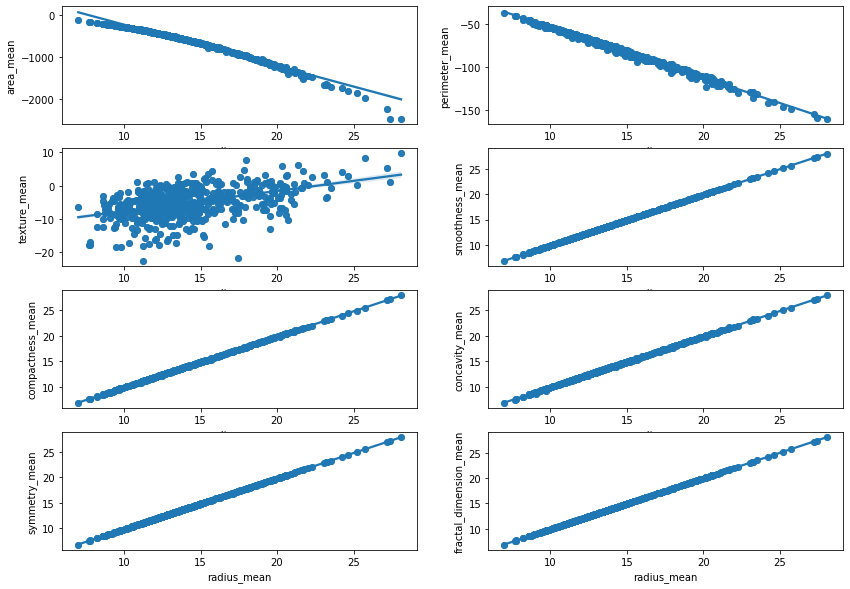

In [27]:
fig,((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,10))
sns.regplot(x='radius_mean',y='area_mean',data=df,scatter=True,fit_reg=True,ax=ax1)
sns.regplot(x='radius_mean',y='perimeter_mean',data=df,scatter=True,fit_reg=True,ax=ax2)
sns.regplot(x='radius_mean',y='texture_mean',data=df,scatter=True,fit_reg=True,ax=ax3)
sns.regplot(x='radius_mean',y='smoothness_mean',data=df,scatter=True,fit_reg=True,ax=ax4)
sns.regplot(x='radius_mean',y='compactness_mean',data=df,scatter=True,fit_reg=True,ax=ax5)
sns.regplot(x='radius_mean',y='concavity_mean',data=df,scatter=True,fit_reg=True,ax=ax6)
sns.regplot(x='radius_mean',y='symmetry_mean',data=df,scatter=True,fit_reg=True,ax=ax7)
sns.regplot(x='radius_mean',y='fractal_dimension_mean',data=df,scatter=True,fit_reg=True,ax=ax8)

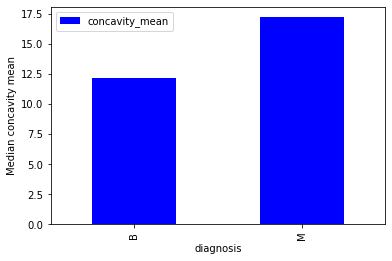

In [28]:
cm = df.pivot_table(index='diagnosis',values='concavity_mean',aggfunc=np.median)
cm.plot(kind='bar',color='blue')
plt.ylabel('Median concavity mean')
plt.show()

<AxesSubplot:xlabel='radius_mean', ylabel='diagnosis'>

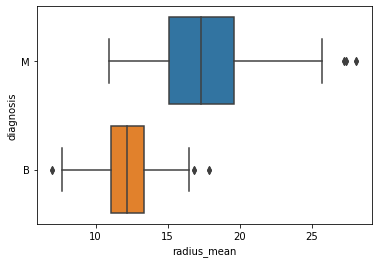

In [29]:
sns.boxplot(x='radius_mean',y='diagnosis',data=df)

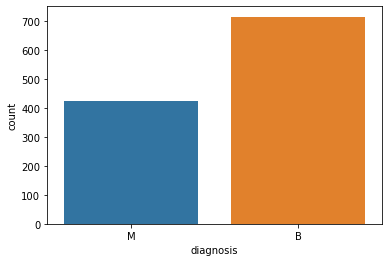

In [30]:
sns.countplot(x='diagnosis', data=df)
plt.show()

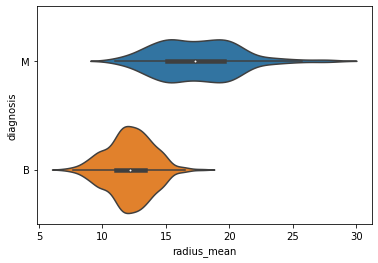

In [31]:
sns.violinplot(x='radius_mean',y='diagnosis',data=df)
plt.show()

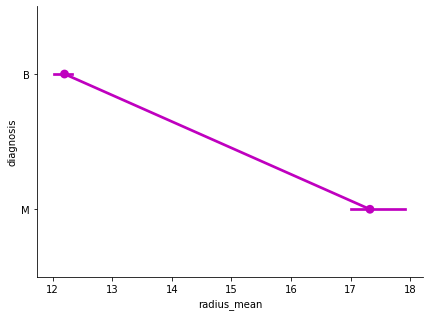

In [32]:
sns.factorplot('radius_mean','diagnosis',data=df,color='m',
              estimator=np.median,order=['B','M'],size=4.5,aspect=1.35)
plt.show()

Text(0.5, 1.0, 'Distribution of diagnosis')

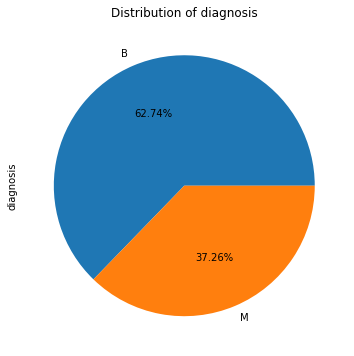

In [33]:
df['diagnosis'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of diagnosis")

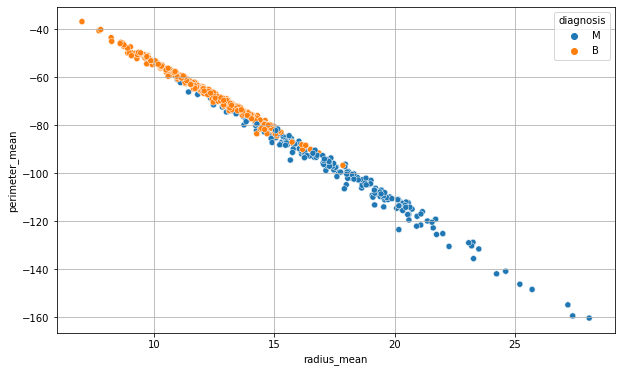

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="radius_mean",y="perimeter_mean",hue='diagnosis',data=df,ax=ax)
plt.grid()
plt.show()

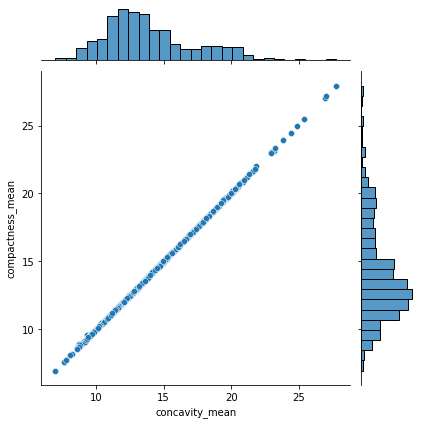

In [35]:
sns.jointplot(x="concavity_mean",y="compactness_mean",data=df)
plt.show()

In [ ]:
sns.pairplot(df,size=2,kind='scatter',diag_kind='kde')
plt.show()